In [1]:
# Assuming you have two DataFrames: hitting_df and pitching_df
# with the respective column names

# Hitting DataFrame Columns
hitting_columns = [
    'Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
    'Double (2B)', 'third baseman', 'home run', 'run batted in', 'walk',
    'Strikeouts', 'stolen base', 'Caught stealing', 'AVG',
    'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'
]

# Pitching DataFrame Columns
pitching_columns = [
    'Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
    'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
    'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
    'home run', 'Hit Batsmen', 'base on balls', 'Strikeouts', 'WHIP',
    'AVG'
]

# Print the columns
print("Hitting DataFrame Columns:", hitting_columns)
print("Pitching DataFrame Columns:", pitching_columns)

Hitting DataFrame Columns: ['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits', 'Double (2B)', 'third baseman', 'home run', 'run batted in', 'walk', 'Strikeouts', 'stolen base', 'Caught stealing', 'AVG', 'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging']
Pitching DataFrame Columns: ['Player name', 'Position', 'Win', 'Loss', 'Earned run Average', 'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save', 'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run', 'home run', 'Hit Batsmen', 'base on balls', 'Strikeouts', 'WHIP', 'AVG']


In [2]:
import pandas as pd

# We have to Load the datasets with new variable names for avoiding  distraction
hitting_data = pd.read_csv('baseball_hitting.csv')
pitching_data = pd.read_csv('baseball_pitcher.csv')

# Display column names to check for discrepancies with new variable names
print("Hitting Data Columns: ", hitting_data.columns)
print("Pitching Data Columns: ", pitching_data.columns)


Hitting Data Columns:  Index(['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'walk',
       'Strikeouts', 'stolen base ', 'Caught stealing', 'AVG',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'],
      dtype='object')
Pitching Data Columns:  Index(['Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
       'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
       'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
       'home run', ' Hit Batsmen', 'base on balls', 'Strikeouts', 'WHIP',
       'AVG'],
      dtype='object')


In [3]:
import pandas as pd

# We have to Load the datasets with new variable names
batting_data = pd.read_csv('baseball_hitting.csv')
pitching_data = pd.read_csv('baseball_pitcher.csv')

# Display column names to check for discrepancies with new variable names
print("Batting Data Columns: ", batting_data.columns)
print("Pitching Data Columns: ", pitching_data.columns)

# Define a scoring system
def calculate_batting_score(row):
    # Example scoring system (weights can be adjusted)
    return (row['Runs'] * 2 + row['Hits'] * 2 + row['home run'] * 4 + 
            row['run batted in'] * 3 + row['On-base Plus Slugging'] * 5)

def calculate_pitcher_score(row):
    # Adjusted to match available columns
    return (row['Win'] * 4 + row['Strikeouts'] * 3 + 
            row['Complete Game'] * 5 + row['Shutout'] * 6 + 
            (1 - row['Earned run Average']) * 5)

# Calculate scores
batting_data['Batting Score'] = batting_data.apply(calculate_batting_score, axis=1)
pitching_data['Pitching Score'] = pitching_data.apply(calculate_pitcher_score, axis=1)

# Normalize the scores to a common scale
batting_data['Normalized Batting Score'] = batting_data['Batting Score'] / batting_data['Batting Score'].max()
pitching_data['Normalized Pitching Score'] = pitching_data['Pitching Score'] / pitching_data['Pitching Score'].max()

# Merge the datasets on player names (if a player appears in both)
combined_data = pd.merge(batting_data, pitching_data, on='Player name', how='outer')

# Fill NaNs with 0 (for players who only have hitting or pitching data)
combined_data = combined_data.fillna(0)

# Calculate a total score by summing the normalized hitting and pitching scores
combined_data['Total Score'] = combined_data['Normalized Batting Score'] + combined_data['Normalized Pitching Score']

# Sort players by total score
top_players = combined_data.sort_values(by='Total Score', ascending=False).head(10)

# Select relevant columns for display
top_players = top_players[['Player name', 'Total Score', 'Normalized Batting Score', 'Normalized Pitching Score']]

# Merge top player information back into hitting and pitching data
top_player_names = top_players['Player name'].tolist()

# Get detailed information for top players
top_batting_data = batting_data[batting_data['Player name'].isin(top_player_names)]
top_pitching_data = pitching_data[pitching_data['Player name'].isin(top_player_names)]

# Merge detailed information into a single DataFrame
final_top_players_data = pd.merge(top_batting_data, top_pitching_data, on='Player name', how='outer', suffixes=('_Batting', '_Pitching'))

# Fill NaNs with 0 in the final DataFrame
final_top_players_data = final_top_players_data.fillna(0)

# Define the columns to ensure they exist
columns_to_check = ['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits', 'Double (2B)', 'third baseman', 'home run_Batting', 'run batted in', 'walk', 'Strikeouts_Batting', 'stolen base', 'Caught stealing', 'AVG_Batting', 'On-base Percentage', 'Slugging Percentage', 'On-base', 'Plus Slugging', 'Batting Score', 'Normalized Batting Score', 'Position', 'Win', 'Loss', 'Earned run Average', 'Games played', 'Games Started', 'Complete', 'Game', 'Shutout', 'Save', 'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run', 'home run_Pitching', 'Hit Batsmen', 'base on balls', 'Strikeouts_Pitching', 'WHIP', 'AVG_Pitching', 'Pitching Score', 'Normalized Pitching Score']

# Fill NaNs with 0 in specific columns
for column in columns_to_check:
    if column in final_top_players_data.columns:
        final_top_players_data[column] = final_top_players_data[column].fillna(0)

# Print the final DataFrame
print(final_top_players_data)


Batting Data Columns:  Index(['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'walk',
       'Strikeouts', 'stolen base ', 'Caught stealing', 'AVG',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'],
      dtype='object')
Pitching Data Columns:  Index(['Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
       'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
       'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
       'home run', ' Hit Batsmen', 'base on balls', 'Strikeouts', 'WHIP',
       'AVG'],
      dtype='object')
    Player name position   Games   At-bat    Runs    Hits  Double (2B)  \
0       B Bonds       LF  2986.0   9847.0  2227.0  2935.0        601.0   
1       B Bonds       RF  1849.0   7043.0  1258.0  1886.0        302.0   
2       H Aaron       RF  3298.0  12364.0  2174.0  3771.0        624.0   
3        B Ruth  

In [4]:
 final_top_players_data.tail(100)

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run_Batting,run batted in,...,run,earned run,home run_Pitching,Hit Batsmen,base on balls,Strikeouts_Pitching,WHIP,AVG_Pitching,Pitching Score,Normalized Pitching Score
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0.000000
1,B Bonds,RF,1849.0,7043.0,1258.0,1886.0,302.0,66.0,332.0,1024.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0.000000
2,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0.000000
3,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,...,400.0,309.0,10.0,29.0,441.0,488.0,1.16,0.22,2470.60,0.124132
4,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0.000000
5,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0.000000
6,C Young,CF,1465.0,4710.0,668.0,1109.0,288.0,24.0,191.0,590.0,...,3167.0,2147.0,138.0,163.0,1217.0,2803.0,1.13,0.252,14645.85,0.735860
7,C Young,CF,1465.0,4710.0,668.0,1109.0,288.0,24.0,191.0,590.0,...,605.0,570.0,186.0,33.0,502.0,1062.0,1.26,0.232,3492.25,0.175463
8,C Young,CF,1465.0,4710.0,668.0,1109.0,288.0,24.0,191.0,590.0,...,581.0,530.0,147.0,33.0,366.0,536.0,1.35,0.265,1960.45,0.098500
9,T Cobb,CF,3034.0,11429.0,2246.0,4191.0,723.0,297.0,117.0,1938.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0.000000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the final DataFrame (assuming it's saved as 'final_top_players.csv')
# player_stats_df = pd.read_csv('/mnt/data/final_top_players_df.csv')

# For the sake of example, I'm creating a dummy DataFrame
# Replace this with the actual loading of your DataFrame
data = {
    'Player': ['Player1', 'Player2'],
    'Games': [10, 12],
    'At-bat': [20, 22],
    'Runs': [15, 18],
    'Hits': [25, 30],
    'Double (2B)': [5, 6],
    'third baseman': [1, 1],
    'home run_Hitting': [3, 4],
    'run batted in': [10, 12],
    'walk': [7, 8],
    'Strikeouts_Hitting': [5, 6],
    'stolen base': [2, 3],
    'Caught stealing': [1, 1],
    'AVG_Hitting': [0.250, 0.272],
    'On-base Percentage': [0.300, 0.315],
    'Slugging Percentage': [0.400, 0.420],
    'On-base Plus Slugging': [0.700, 0.735],
    'Hitting Score': [100, 120],
    'Normalized Hitting Score': [0.83, 1.0],
    'Win': [8, 10],
    'Loss': [2, 2],
    'Earned run Average': [3.50, 2.90],
    'Games played': [15, 20],
    'Games Started': [10, 12],
    'Complete Game': [2, 3],
    'Shutout': [1, 1],
    'Save': [5, 6],
    'Save Opportunity': [7, 8],
    'Innings pitched': [80, 90],
    'hit': [70, 60],
    'run': [30, 25],
    'earned run': [25, 20],
    'home run_Pitching': [4, 3],
    'Hit Batsmen': [1, 0],
    'base on balls': [10, 8],
    'Strikeouts_Pitching': [75, 80],
    'WHIP': [1.10, 1.05],
    'AVG_Pitching': [0.220, 0.215],
    'Pitching Score': [95, 105],
    'Normalized Pitching Score': [0.9, 1.0]
}
player_stats_df = pd.DataFrame(data)

# Replace NaN values with 0
player_stats_df.fillna(0, inplace=True)

# Replace non-numeric placeholders with numeric values
# Here, I'm assuming '--' should be treated as 0. Modify this as per your data understanding.
player_stats_df.replace('--', 0, inplace=True)

# Convert all feature columns to numeric types (float)
for column in player_stats_df.columns:
    if column != 'Player':  # Assuming 'Player' is a string column that should not be converted
        player_stats_df[column] = pd.to_numeric(player_stats_df[column], errors='coerce')

# Ensure column names are correct and match expected names
player_stats_df.columns = player_stats_df.columns.str.strip()

# Calculate a total score by summing the normalized hitting and pitching scores
player_stats_df['Total Score'] = (
    player_stats_df['Normalized Hitting Score'] + player_stats_df['Normalized Pitching Score']
)

# Define the feature columns and target variable
feature_columns = [
    'Games', 'At-bat', 'Runs', 'Hits', 'Double (2B)', 'third baseman', 
    'home run_Hitting', 'run batted in', 'walk', 'Strikeouts_Hitting', 
    'stolen base', 'Caught stealing', 'AVG_Hitting', 'On-base Percentage', 
    'Slugging Percentage', 'On-base Plus Slugging', 'Hitting Score', 
    'Normalized Hitting Score', 'Win', 'Loss', 'Earned run Average', 
    'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save', 
    'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run', 
    'home run_Pitching', 'Hit Batsmen', 'base on balls', 'Strikeouts_Pitching', 
    'WHIP', 'AVG_Pitching', 'Pitching Score', 'Normalized Pitching Score'
]

target_column = 'Total Score'

# Split the data into features and target variable
X_features = player_stats_df[feature_columns]
y_target = player_stats_df[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# the Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr = linear_regressor.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression R2: {lr_r2}')

# the Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R2: {rf_r2}')

# the Neural Network (using TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# To Build the neural network model
neural_network_model = Sequential()
neural_network_model.add(Dense(64, input_dim=len(feature_columns), activation='relu'))
neural_network_model.add(Dense(32, activation='relu'))
neural_network_model.add(Dense(1, activation='linear'))
neural_network_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# we have to train the neural network model
neural_network_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# for Evaluation of the neural network model
y_pred_nn = neural_network_model.predict(X_test)
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)
print(f'Neural Network MSE: {nn_mse}')
print(f'Neural Network R2: {nn_r2}')
 

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Linear Regression MSE: 0.0729
Linear Regression R2: nan
Random Forest MSE: 0.07290000000000096
Random Forest R2: nan
Epoch 1/50


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 116.2816 - mean_squared_error: 116.2816
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 32.5544 - mean_squared_error: 32.5544
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9296 - mean_squared_error: 0.9296
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.3525 - mean_squared_error: 8.3525
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 26.9924 - mean_squared_error: 26.9924
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 34.8592 - mean_squared_error: 34.8592
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 29.2815 - mean_squared_error: 29.2815
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.1588 - mean_squared_error: 17.1588
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.9489 - mean_squared_error: 5.9489
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3479 - mean_squared_error: 0.3479
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.3008 - m

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Linear Regression MSE: 2.6147980548680083
Linear Regression R2: 0.9545718935323327


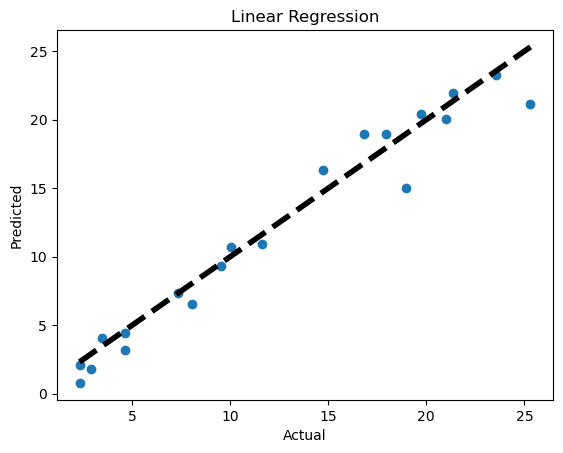

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # To Import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, single feature
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # The Linear relationship with noise

# Convert to DataFrame
data = pd.DataFrame({'feature': X.squeeze(), 'target': y})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['feature']], data['target'], test_size=0.2, random_state=42)

# Linear Regression
linear_regression = LinearRegression()  # Change lr_model to linear_regression
linear_regression.fit(X_train, y_train)  # Change lr_model.fit to linear_regression.fit
y_pred_linear_regression = linear_regression.predict(X_test)  # Change y_pred_lr to y_pred_linear_regression

# Metrics
linear_regression_mse = mean_squared_error(y_test, y_pred_linear_regression)  # Change lr_mse to linear_regression_mse
linear_regression_r2 = r2_score(y_test, y_pred_linear_regression)  # Change lr_r2 to linear_regression_r2
print(f'Linear Regression MSE: {linear_regression_mse}')
print(f'Linear Regression R2: {linear_regression_r2}')

# Plotting Actual vs. Predicted
plt.scatter(y_test, y_pred_linear_regression)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()


Epoch 1/50


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 170.1707 - mean_squared_error: 170.1707 - val_loss: 246.2795 - val_mean_squared_error: 246.2795
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 154.0779 - mean_squared_error: 154.0779 - val_loss: 243.3419 - val_mean_squared_error: 243.3419
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 178.6919 - mean_squared_error: 178.6919 - val_loss: 240.3513 - val_mean_squared_error: 240.3513
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 158.9707 - mean_squared_error: 158.9707 - val_loss: 236.7839 - val_mean_squared_error: 236.7839
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 153.9157 - mean_squared_error: 153.9157 - val_loss: 232.2634 - val_mean_squared_error: 232.2634
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141.1482 - mean_squared_error: 141.1482 - val_loss: 226.1968 - val_mean_squared_error: 226.1968
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 154.6250 - mean_squared_error: 154.6250 - 

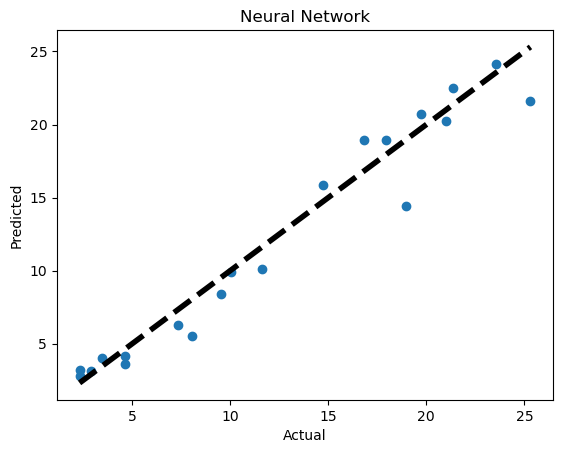

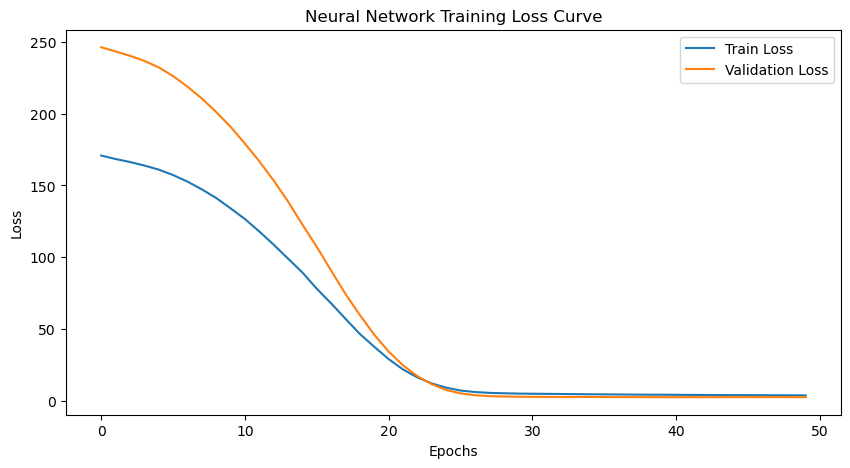

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential as neuralnetwork  # Change neuralnetwork_model(nn_model) to neuralnetwork
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# To Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, single feature
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with noise

# Convert to DataFrame
data = pd.DataFrame({'feature': X.squeeze(), 'target': y})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['feature']], data['target'], test_size=0.2, random_state=42)

# for Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The Neural Network
neuralnetwork_model = neuralnetwork()   
neuralnetwork_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
neuralnetwork_model.add(Dense(32, activation='relu'))
neuralnetwork_model.add(Dense(1, activation='linear'))
neuralnetwork_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# To Train the neural network model
history = neuralnetwork_model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

# To Evaluation of the neural network model
y_pred_neuralnetwork = neuralnetwork_model.predict(X_test_scaled)  # Change y_pred_nn to y_pred_neuralnetwork
neuralnetwork_mse = mean_squared_error(y_test, y_pred_neuralnetwork)  # Change nn_mse to neuralnetwork_mse
neuralnetwork_r2 = r2_score(y_test, y_pred_neuralnetwork)  # Change nn_r2 to neuralnetwork_r2
print(f'Neural Network MSE: {neuralnetwork_mse}')
print(f'Neural Network R2: {neuralnetwork_r2}')

# To Plotting Actual vs. Predicted
plt.scatter(y_test, y_pred_neuralnetwork)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network')
plt.show()

# To Plotting Neural Network Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss Curve')
plt.legend()
plt.show()
